In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot
%matplotlib inline

In [3]:
kdd = pd.read_csv('kddcup.data.corrected', names=np.linspace(1,42,42))

In [4]:
kdd.head()

1.0  2.0   3.0  4.0   5.0    6.0   7.0   8.0   9.0   10.0   ...     33.0  \
0     0  tcp  http   SF   215  45076     0     0     0     0   ...        0   
1     0  tcp  http   SF   162   4528     0     0     0     0   ...        1   
2     0  tcp  http   SF   236   1228     0     0     0     0   ...        2   
3     0  tcp  http   SF   233   2032     0     0     0     0   ...        3   
4     0  tcp  http   SF   239    486     0     0     0     0   ...        4   

   34.0  35.0  36.0  37.0  38.0  39.0  40.0  41.0     42.0  
0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0  normal.  
1   1.0   0.0  1.00   0.0   0.0   0.0   0.0   0.0  normal.  
2   1.0   0.0  0.50   0.0   0.0   0.0   0.0   0.0  normal.  
3   1.0   0.0  0.33   0.0   0.0   0.0   0.0   0.0  normal.  
4   1.0   0.0  0.25   0.0   0.0   0.0   0.0   0.0  normal.  

[5 rows x 42 columns]

In [29]:
kdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
1.0     int64
2.0     object
3.0     object
4.0     object
5.0     int64
6.0     int64
7.0     int64
8.0     int64
9.0     int64
10.0    int64
11.0    int64
12.0    int64
13.0    int64
14.0    int64
15.0    int64
16.0    int64
17.0    int64
18.0    int64
19.0    int64
20.0    int64
21.0    int64
22.0    int64
23.0    int64
24.0    int64
25.0    float64
26.0    float64
27.0    float64
28.0    float64
29.0    float64
30.0    float64
31.0    float64
32.0    int64
33.0    int64
34.0    float64
35.0    float64
36.0    float64
37.0    float64
38.0    float64
39.0    float64
40.0    float64
41.0    float64
42.0    object
dtypes: float64(15), int64(23), object(4)
memory usage: 1.5+ GB


In [6]:
def classDetector(x):
    if x == 'normal.':
        return 0
    else:
        return 1

In [7]:
def classDetector1(x):
    if x == 'normal.':
        return 0
    else:
        return 1000

In [32]:
kdd[42.0]=kdd[42.0].apply(classDetector1)

In [8]:
kdd[42.0]=kdd[42.0].apply(classDetector)

In [34]:
kdd

1.0  2.0   3.0  4.0   5.0    6.0   7.0   8.0   9.0   10.0  ...   \
0           0  tcp  http   SF   215  45076     0     0     0     0  ...    
1           0  tcp  http   SF   162   4528     0     0     0     0  ...    
2           0  tcp  http   SF   236   1228     0     0     0     0  ...    
3           0  tcp  http   SF   233   2032     0     0     0     0  ...    
4           0  tcp  http   SF   239    486     0     0     0     0  ...    
5           0  tcp  http   SF   238   1282     0     0     0     0  ...    
6           0  tcp  http   SF   235   1337     0     0     0     0  ...    
7           0  tcp  http   SF   234   1364     0     0     0     0  ...    
8           0  tcp  http   SF   239   1295     0     0     0     0  ...    
9           0  tcp  http   SF   181   5450     0     0     0     0  ...    
10          0  tcp  http   SF   184    124     0     0     0     0  ...    
11          0  tcp  http   SF   185   9020     0     0     0     0  ...    
12          0  tcp  http   SF   239   1295     0     0     0     0  ...    
13          0  tcp  http   SF   181   5450     0     0     0     0  ...    
14          0  tcp  http   SF   236   1228     0     0     0     0  ...    
15          0  tcp  http   SF   233   2032     0     0     0     0  ...    
16          0  tcp  http   SF   238   1282     0     0     0     0  ...    
17          0  tcp  http   SF   235   1337     0     0     0     0  ...    
18          0  tcp  http   SF   234   1364     0     0     0     0  ...    
19          0  tcp  http   SF   239    486     0     0     0     0  ...    
20          0  tcp  http   SF   185   9020     0     0     0     0  ...    
21          0  tcp  http   SF   184    124     0     0     0     0  ...    
22          0  tcp  http   SF   181   5450     0     0     0     0  ...    
23          0  tcp  http   SF   239   1295     0     0     0     0  ...    
24          0  tcp  http   SF   236   1228     0     0     0     0  ...    
25          0  tcp  http   SF   233   2032     0     0     0     0  ...    
26          0  tcp  http   SF   239    486     0     0     0     0  ...    
27          0  tcp  http   SF   238   1282     0     0     0     0  ...    
28          0  tcp  http   SF   234   1364     0     0     0     0  ...    
29          0  tcp  http   SF   235   1337     0     0     0     0  ...    
...       ...  ...   ...  ...   ...    ...   ...   ...   ...   ...  ...    
4898401     0  tcp  http   SF   283    466     0     0     0     0  ...    
4898402     0  tcp  http   SF   289   1096     0     0     0     0  ...    
4898403     0  tcp  http   SF   289   1862     0     0     0     0  ...    
4898404     0  tcp  http   SF   203    242     0     0     0     0  ...    
4898405     0  tcp  http   S1   196      0     0     0     0     0  ...    
4898406     0  tcp  http   SF   143  17463     0     0     0     0  ...    
4898407     0  tcp  http   SF   202   4017     0     0     0     0  ...    
4898408     0  tcp  http   SF     0    234     0     0     0     0  ...    
4898409     0  tcp  http   SF   203   1200     0     0     0     0  ...    
4898410     0  tcp  http   SF   198   2169     0     0     0     0  ...    
4898411     0  tcp  http   SF   197    466     0     0     0     0  ...    
4898412     0  tcp  http   SF   203   1862     0     0     0     0  ...    
4898413     0  tcp  http   SF   203   1096     0     0     0     0  ...    
4898414     0  tcp  http   SF   284   2286     0     0     0     0  ...    
4898415     0  tcp  http   SF   290   4017     0     0     0     0  ...    
4898416     0  tcp  http   SF   291    234     0     0     0     0  ...    
4898417     0  tcp  http   SF   291    242     0     0     0     0  ...    
4898418     0  tcp  http   SF   231  17463     0     0     0     0  ...    
4898419     0  tcp  http   SF   291   1200     0     0     0     0  ...    
4898420     0  tcp  http   SF   285    466     0     0     0     0  ...    
4898421     0  tcp  http   SF   286   2169     0     0   

In [9]:
kdd[42.0].value_counts()

1    3925650
0     972781
Name: 42.0, dtype: int64

In [36]:
kdd_labeled[2.0].value_counts()

NameError: name 'kdd_labeled' is not defined

In [ ]:
kdd_labeled[3.0].value_counts()

In [70]:
kdd_labeled[4].value_counts()

9     3744328
5      869829
1      268874
4        8094
2        5344
10       1040
6         532
7         161
3         122
0          57
8          50
Name: 4.0, dtype: int64

In [42]:
kdd[42].value_counts()

1    4898431
Name: 42.0, dtype: int64

In [ ]:
kdd.to_csv('kdd1000.csv',index=False)

In [41]:
kdd.columns

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
              23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0,
              34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0],
             dtype='float64')

In [44]:
kdd_labeled.head()

1.0   2.0   3.0   4.0   5.0    6.0   7.0   8.0   9.0   10.0  ...   33.0  \
0     0     1    24     9   213  19600     0     0     0     0  ...      0   
1     0     1    24     9   160   4511     0     0     0     0  ...      1   
2     0     1    24     9   234   1221     0     0     0     0  ...      2   
3     0     1    24     9   231   2025     0     0     0     0  ...      3   
4     0     1    24     9   237    479     0     0     0     0  ...      4   

   34.0  35.0  36.0  37.0  38.0  39.0  40.0  41.0  42.0  
0     0     0     0     0     0     0     0     0     0  
1   100     0   100     0     0     0     0     0     0  
2   100     0    50     0     0     0     0     0     0  
3   100     0    33     0     0     0     0     0     0  
4   100     0    25     0     0     0     0     0     0  

[5 rows x 42 columns]

In [45]:
from sklearn.model_selection import train_test_split
X = kdd_labeled.drop(42,axis=1)
y = kdd_labeled[42]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
kddDtree=DecisionTreeClassifier()

In [48]:
kddDtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
prediction = kddDtree.predict(X_test)

In [51]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    340369
          1       1.00      1.00      1.00   1374082

avg / total       1.00      1.00      1.00   1714451



In [53]:
print((confusion_matrix(y_test,prediction)))

[[ 340323      46]
 [     65 1374017]]


In [54]:
features = list(kdd_labeled.columns[:41])


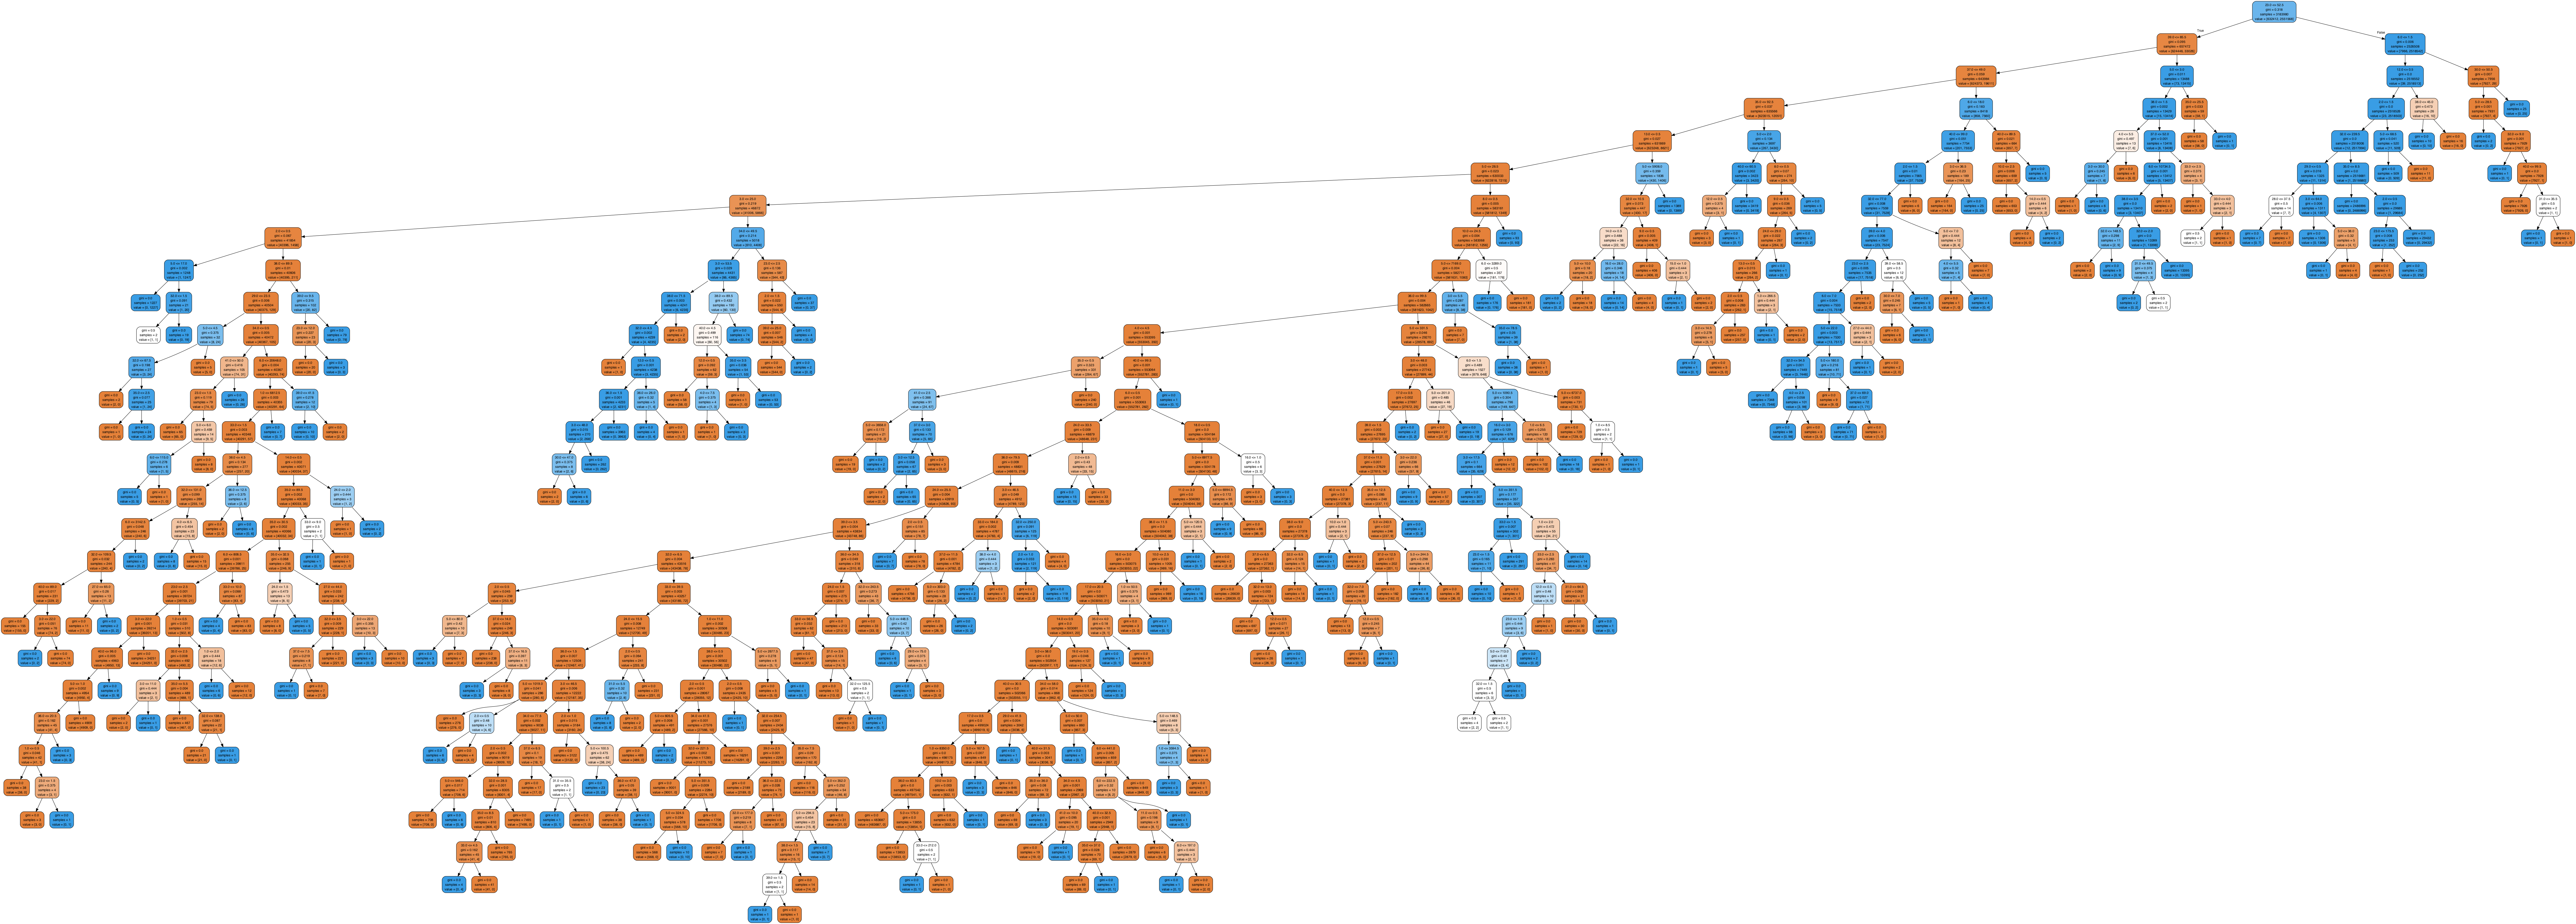

In [55]:
dot_data = StringIO()  
export_graphviz(kddDtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [25]:
pruneTree=kddDtree
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(pruneTree.tree_.children_left < 0))
# start pruning from the root
prune_index(pruneTree.tree_, 0, 1500) #1/100 of outliers 9727
sum(pruneTree.tree_.children_left < 0)

NameError: name 'kddDtree' is not defined

In [57]:
dot_data = StringIO()  
export_graphviz(pruneTree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [58]:
predictions = pruneTree.predict(X_test)

In [59]:
print((confusion_matrix(y_test,predictions)))

[[ 335518    4851]
 [   4703 1369379]]


In [60]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99    340369
          1       1.00      1.00      1.00   1374082

avg / total       0.99      0.99      0.99   1714451



In [75]:
from sklearn.tree import _tree
def tree_to_code(tree, feature_names, Y):
    tree_= tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)

In [76]:
tree_to_code(pruneTree,features,1)

1 ) 23.0 <= 51.5  & 26.0 <= 62.5  & 37.0 <= 49.5  & 35.0 <= 91.5  & 13.0 <= 0.5  [[ 0. 20.]]
2 ) 23.0 <= 51.5  & 26.0 <= 62.5  & 37.0 <= 49.5  & 35.0 <= 91.5  & 13.0 > 0.5 [[ 0. 20.]]
3 ) 23.0 <= 51.5  & 26.0 <= 62.5  & 37.0 <= 49.5  & 35.0 > 91.5 & 5.0 <= 2.0  [[ 0. 20.]]
4 ) 23.0 <= 51.5  & 26.0 <= 62.5  & 37.0 <= 49.5  & 35.0 > 91.5 & 5.0 > 2.0 [[ 0. 20.]]
5 ) 23.0 <= 51.5  & 26.0 <= 62.5  & 37.0 > 49.5 & 6.0 <= 17.5  [[ 0. 20.]]
6 ) 23.0 <= 51.5  & 26.0 <= 62.5  & 37.0 > 49.5 & 6.0 > 17.5 [[ 0. 20.]]
7 ) 23.0 <= 51.5  & 26.0 > 62.5 & 5.0 <= 2.5  [[ 0. 20.]]
8 ) 23.0 <= 51.5  & 26.0 > 62.5 & 5.0 > 2.5 [[ 0. 20.]]
9 ) 23.0 > 51.5 & 6.0 <= 1.5  [[ 0. 20.]]
10 ) 23.0 > 51.5 & 6.0 > 1.5 [[ 0. 20.]]
